In [6]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!git clone https://github.com/razorx89/roco-dataset.git

Cloning into 'roco-dataset'...
remote: Enumerating objects: 114, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 114 (delta 7), reused 20 (delta 7), pack-reused 91 (from 1)
Receiving objects: 100% (114/114), 13.01 MiB | 14.48 MiB/s, done.
Resolving deltas: 100% (31/31), done.


In [3]:
!python3 /content/roco-dataset/scripts/fetch.py


Streaming output truncated to the last 5000 lines.
89.311% | 41617/46598 | PMC4432449
89.313% | 41618/46598 | PMC1978243
89.315% | 41619/46598 | PMC3953627
89.317% | 41620/46598 | PMC4675004
89.319% | 41621/46598 | PMC5502573
89.321% | 41622/46598 | PMC4460548
89.324% | 41623/46598 | PMC3290114
89.326% | 41624/46598 | PMC4435852
89.328% | 41625/46598 | PMC2740835
89.330% | 41626/46598 | PMC2253542
89.332% | 41627/46598 | PMC4055357
89.334% | 41628/46598 | PMC4564506
89.336% | 41629/46598 | PMC3954297
89.339% | 41630/46598 | PMC1368977
89.341% | 41631/46598 | PMC3015802
89.343% | 41632/46598 | PMC4143510
89.345% | 41633/46598 | PMC3627160
89.347% | 41634/46598 | PMC2841377
89.349% | 41635/46598 | PMC2629172
89.351% | 41636/46598 | PMC4152832
89.354% | 41637/46598 | PMC3340973
89.356% | 41638/46598 | PMC5133587
89.358% | 41639/46598 | PMC4379335
89.360% | 41640/46598 | PMC4224691
89.362% | 41641/46598 | PMC5721486
89.364% | 41642/46598 | PMC4897456
89.366% | 41643/46598 | PMC5739534
89.3

In [4]:
import shutil

# Specify the source path in Colab and the destination in Google Drive
source_path = '/content/roco-dataset'
destination_path = '/content/drive/MyDrive/ROCO/'

# Move the file or folder
shutil.move(source_path, destination_path)


'/content/drive/MyDrive/ROCO/'

In [ ]:

!zip -r roco.zip . - i /content/drive/MyDrive/ROCO_dataset/

	zip warning: name not matched: i
	zip warning: name not matched: /content/drive/MyDrive/ROCO_dataset/
  adding: .config/ (stored 0%)
  adding: .config/.last_opt_in_prompt.yaml (stored 0%)
  adding: .config/default_configs.db (deflated 98%)
  adding: .config/logs/ (stored 0%)
  adding: .config/logs/2024.11.08/ (stored 0%)
  adding: .config/logs/2024.11.08/14.18.56.060217.log (deflated 93%)
  adding: .config/logs/2024.11.08/14.19.29.280723.log (deflated 86%)
  adding: .config/logs/2024.11.08/14.19.42.809213.log (deflated 56%)
  adding: .config/logs/2024.11.08/14.19.42.125850.log (deflated 57%)
  adding: .config/logs/2024.11.08/14.19.30.265814.log (deflated 58%)
  adding: .config/logs/2024.11.08/14.19.17.448702.log (deflated 58%)
  adding: .config/active_config (stored 0%)
  adding: .config/configurations/ (stored 0%)
  adding: .config/configurations/config_default (deflated 15%)
  adding: .config/gce (stored 0%)
  adding: .config/hidden_gcloud_config_universe_descriptor_data_cache_confi

In [2]:

import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
import re
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision.transforms as transforms

In [7]:
df = pd.read_table('/content/drive/MyDrive/ROCO/data/train/radiology/captions.txt',header=None,names = ['image_id','caption'])
df

,image_id,caption
0,ROCO_00002,Computed tomography scan in axial view showin...
1,ROCO_00003,Bacterial contamination occurred after comple...
2,ROCO_00004,The patient had residual paralysis of the han...
3,ROCO_00005,Panoramic radiograph after immediate loading.
4,ROCO_00007,Plain abdomen x-ray: Multiple air levels at t...
...,...,...
65445,ROCO_81819,Initial CT abdomen with contrast showing a di...
65446,ROCO_81820,44-year-old male patient after surgical amput...
65447,ROCO_81821,Primary pulmonary tuberculosis in 18-year-old...
65448,ROCO_81822,"MRI brain with gadolinium, coronal view, show..."


In [8]:
df['caption'].describe()

,caption
count,65450
unique,64772
top,Initial panoramic radiograph.
freq,19


In [9]:
df['caption'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 65450 entries, 0 to 65449
Series name: caption
Non-Null Count  Dtype 
--------------  ----- 
65450 non-null  object
dtypes: object(1)
memory usage: 511.5+ KB


In [11]:
df['caption'].tail(10)

,caption
65440,Coronal CT image demonstrates the duodenum co...
65441,Spino-iliac angle (SIA): lines were drawn alo...
65442,Hinchey stage III. Intravenous and rectal con...
65443,Decompression tube is inserted followed by th...
65444,Doppler ultrasound revealed extensive thrombo...
65445,Initial CT abdomen with contrast showing a di...
65446,44-year-old male patient after surgical amput...
65447,Primary pulmonary tuberculosis in 18-year-old...
65448,"MRI brain with gadolinium, coronal view, show..."
65449,Contrast-enhanced 3D MRL image of the lower e...


In [12]:
df.columns

Index(['image_id', 'caption'], dtype='object')

In [17]:
print(df.isnull)
#print(df.notnull)

<bound method DataFrame.isnull of          image_id                                            caption
0      ROCO_00002   Computed tomography scan in axial view showin...
1      ROCO_00003   Bacterial contamination occurred after comple...
2      ROCO_00004   The patient had residual paralysis of the han...
3      ROCO_00005      Panoramic radiograph after immediate loading.
4      ROCO_00007   Plain abdomen x-ray: Multiple air levels at t...
...           ...                                                ...
65445  ROCO_81819   Initial CT abdomen with contrast showing a di...
65446  ROCO_81820   44-year-old male patient after surgical amput...
65447  ROCO_81821   Primary pulmonary tuberculosis in 18-year-old...
65448  ROCO_81822   MRI brain with gadolinium, coronal view, show...
65449  ROCO_81823   Contrast-enhanced 3D MRL image of the lower e...

[65450 rows x 2 columns]>


In [19]:
df['caption'].value_counts()

,count
caption,
Initial panoramic radiograph.,19
Preoperative radiograph,15
Postoperative radiograph,13
Chest X-ray,11
Final panoramic radiograph.,11
...,...
Computed tomographic scan of the abdomen and pelvis showed a foreign body invading the posterior wall of the uterus and entering the colon.,1
Computed tomography scan at the level of the lateral ventricles. There is a thin layer of acute subdural hematoma identified on the left with a minimal midline shift (arrow). A = anterior; P = posterior; L = left; R = right.,1
Magnetic resonance imaging of the mass,1


In [22]:
print(df.drop_duplicates(inplace=True))

None


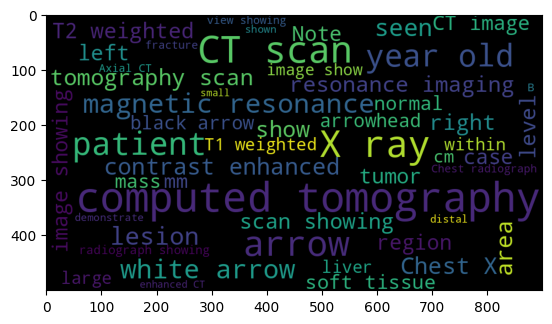

In [23]:
from wordcloud import WordCloud
caption_text=' '.join(df['caption'].astype(str))
wordcloud=WordCloud(width=900,height=500,max_words=50).generate(caption_text)
plt.imshow(wordcloud)

Loading dlink.txt from radiology

In [39]:

dlink_url='/content/drive/MyDrive/ROCO/data/test/non-radiology/dlinks.txt'
dlink = pd.read_table(dlink_url,header = None,names=['image_id','dlink','image'])
dlink

,image_id,dlink,image
0,ROCO_81827,wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...,1678-7757-jaos-14-02-0117-gf05.jpg
1,ROCO_81835,wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...,0036-4665-rimtsp-56-01-00092-gf01.jpg
2,ROCO_81851,wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...,opth-9-169Fig1.jpg
3,ROCO_81853,wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...,10561_2011_9244_Fig1_HTML.jpg
4,ROCO_81857,wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...,jsls-1-1-83-g02.jpg
...,...,...,...
607,ROCO_87910,wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...,10-7162-s-1809-97772012000400015-i160415-2.jpg
608,ROCO_87912,wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...,alm-35-657-g001.jpg
609,ROCO_87919,wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...,BMRI2015-475392.002.jpg
610,ROCO_87932,wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...,1471-2202-14-S1-P193-1.jpg


,dlink
count,612
unique,601
top,wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...
freq,2


In [44]:
# Add a new column 'description_length' that stores the length of each description
dlink['description_length'] = dlink['dlink'].str.len()

# Display the first few rows to verify the new column
print(dlink.head())

     image_id                                              dlink  \
0  ROCO_81827  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   
1  ROCO_81835  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   
2  ROCO_81851  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   
3  ROCO_81853  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   
4  ROCO_81857  wget -r ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_...   

                                   image  description_length  
0     1678-7757-jaos-14-02-0117-gf05.jpg                  93  
1  0036-4665-rimtsp-56-01-00092-gf01.jpg                  93  
2                     opth-9-169Fig1.jpg                  93  
3          10561_2011_9244_Fig1_HTML.jpg                  93  
4                    jsls-1-1-83-g02.jpg                  93  


In [45]:
dlink['description_length'].describe()

,description_length
count,612.000000
mean,92.988562
std,0.106422
min,92.000000
25%,93.000000
50%,93.000000
75%,93.000000
max,93.000000


In [48]:
import pandas as pd
import os

# Load captions data
textdata = pd.read_table('/content/drive/MyDrive/ROCO/data/train/radiology/captions.txt', header=None, names=['Image_ID', 'caption'])

# Create a DataFrame for image files
image_files = r"/content/drive/MyDrive/ROCO/data/train/radiology/images"
image_files_list = os.listdir(image_files)
image_files_df = pd.DataFrame(image_files_list, columns=['image_file'])

# Add an index column to both DataFrames to ensure correct alignment
textdata['index'] = textdata.index
image_files_df['index'] = image_files_df.index

# Merge based on the index column
merged_df = pd.merge(image_files_df, textdata, on='index', how='inner')

# Reorder columns to display image_file first
merged_df = merged_df[['image_file', 'caption']]

# Display the result (ensure both columns are properly aligned)
print(merged_df.head(10))  # Show the first 10 rows, adjust as necessary


       image_file                                            caption
0  ROCO_76568.jpg   Computed tomography scan in axial view showin...
1  ROCO_76578.jpg   Bacterial contamination occurred after comple...
2  ROCO_76580.jpg   The patient had residual paralysis of the han...
3  ROCO_76582.jpg      Panoramic radiograph after immediate loading.
4  ROCO_76595.jpg   Plain abdomen x-ray: Multiple air levels at t...
5  ROCO_76620.jpg   A 3-year-old child with visual difficulties. ...
6  ROCO_76629.jpg   Showing the subtrochanteric fracture in the p...
7  ROCO_76625.jpg   Post orthodontic treatment. Root canal therap...
8  ROCO_76638.jpg   Two sequential thrombi in the distal segment ...
9  ROCO_76630.jpg   An example of MRI image that takes advantage ...


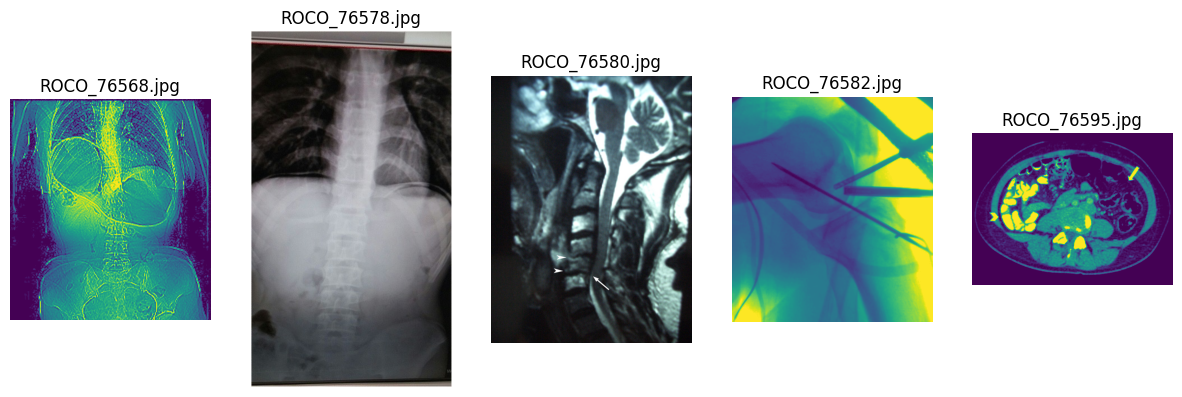

In [51]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to your image folder
image_folder = r"/content/drive/MyDrive/ROCO/data/train/radiology/images"

# List all files in the folder
image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]

# Display 5 images
plt.figure(figsize=(15, 5))
for i, file_name in enumerate(image_files[:5]):  # Get only the first 5 images
    img_path = os.path.join(image_folder, file_name)
    img = Image.open(img_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(file_name)

plt.show()

list contains of images

In [52]:
img ="/content/drive/MyDrive/ROCO/data/train/radiology/images"
list1 = []
if os.path.exists(img):
    for file in os.listdir(img):
        list1.append(file)
else:
    print(f"The path {img} does not exist.")
len(list1)

48085

Display images with their respective captions

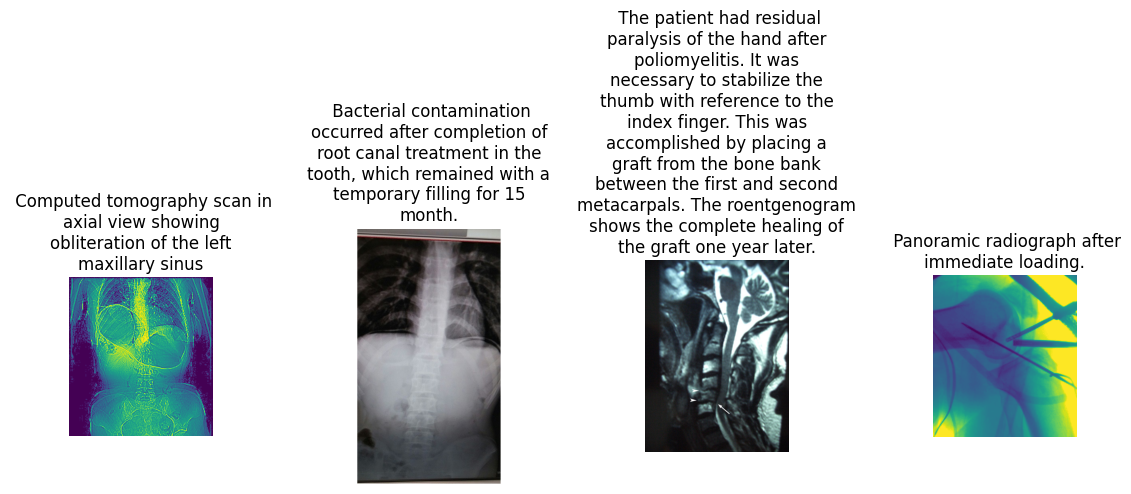

In [60]:
import textwrap

file_names1 = os.listdir(img)
wrap_width = 30

fig, axs = plt.subplots(1,4, figsize=(13, 15))

plt.subplots_adjust(wspace = 1,hspace=1)
axs = axs.flatten()
for i in range(4):
    file_path = os.path.join(img, list1[i])
    image = Image.open(file_path)
    caption = df["caption"][i]
    wrapped_caption = "\n".join(textwrap.wrap(caption, wrap_width))
    axs[i].imshow(image)
    axs[i].set_title(wrapped_caption)
    axs[i].axis('off')

plt.show()

In [61]:
data_dir = '/content/drive/MyDrive/ROCO/data'

# Initialize an empty list to store the data
data = []

# Iterate through each split (train, test, validation)
for split in ['train', 'test', 'validation']:
    split_dir = os.path.join(data_dir, split)

    # Iterate through each category (radiology, non-radiology)
    for category in ['radiology', 'non-radiology']:
        category_dir = os.path.join(split_dir, category)
        captions_file = os.path.join(category_dir, 'captions.txt')

        # Read captions.txt if it exists
        if os.path.exists(captions_file):
            with open(captions_file, 'r') as file:
                # Read each line in the file as a caption
                for line in (file):
                    caption = line[12:].strip()
                    id = line[:12]
                    label = 'radiology' if category == 'radiology' else 'non-radiology'
                    # Append the caption, label, and split type to the data list
                    data.append([id,caption, label, split])

# Create a DataFrame with the collected data
data = pd.DataFrame(data, columns=['image_id','Caption', 'Label', 'Split'])

data

,image_id,Caption,Label,Split
0,ROCO_00002\t,Computed tomography scan in axial view showing...,radiology,train
1,ROCO_00003\t,Bacterial contamination occurred after complet...,radiology,train
2,ROCO_00004\t,The patient had residual paralysis of the hand...,radiology,train
3,ROCO_00005\t,Panoramic radiograph after immediate loading.,radiology,train
4,ROCO_00007\t,Plain abdomen x-ray: Multiple air levels at th...,radiology,train
...,...,...,...,...
87922,ROCO_87894\t,Scanning electron photomicrograph of blood cel...,non-radiology,validation
87923,ROCO_87904\t,SEM of Solenopsis elhawagryi sp. n. minor work...,non-radiology,validation
87924,ROCO_87918\t,Under visualization through the anterolateral ...,non-radiology,validation
87925,ROCO_87936\t,The endoscopic view demonstrated progressive d...,non-radiology,validation


<ipython-input-72-04817d63bd60>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=split_counts.index, y=split_counts.values, palette=['green', 'yellow', 'blue'])


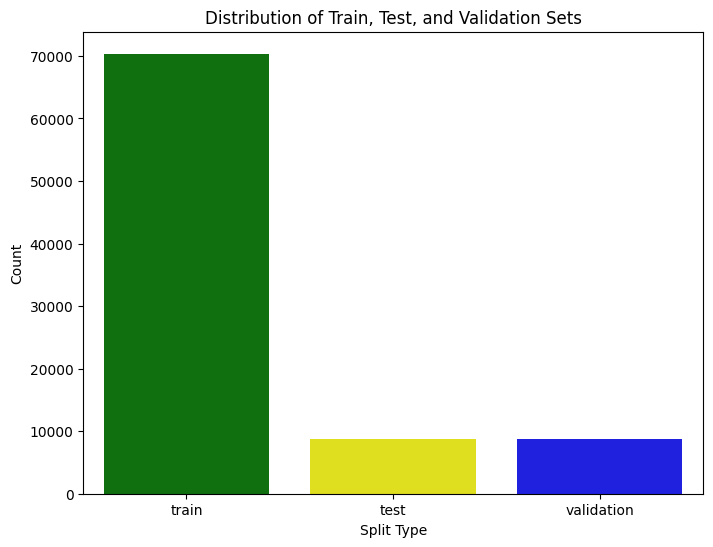

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Split' contains categories like 'train', 'test', and 'validation'
split_counts = data['Split'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=split_counts.index, y=split_counts.values, palette=['green', 'yellow', 'blue'])
plt.title('Distribution of Train, Test, and Validation Sets')
plt.xlabel('Split Type')
plt.ylabel('Count')
plt.show()


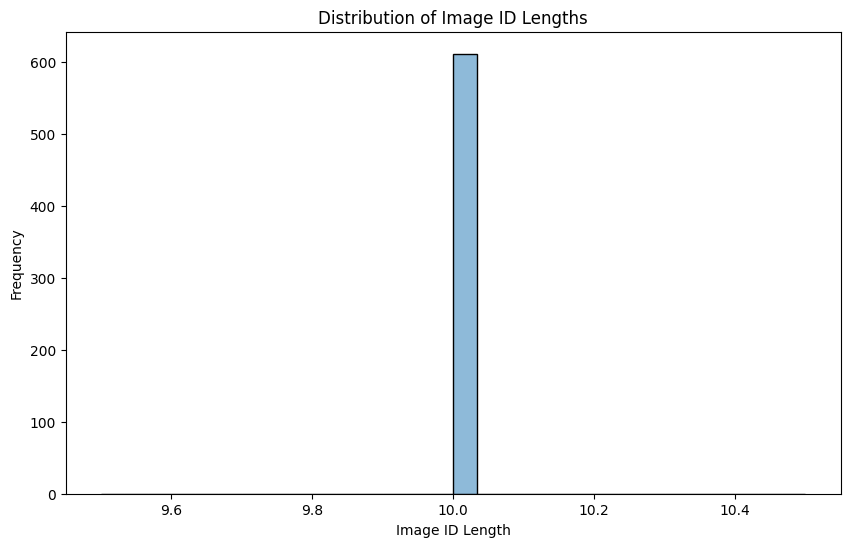

In [69]:
dlink['image_id_length'] = dlink['image_id'].astype(str).apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(dlink['image_id_length'], bins=30, kde=True)
plt.title('Distribution of Image ID Lengths')
plt.xlabel('Image ID Length')
plt.ylabel('Frequency')
plt.show()


IMage Preprocessing

In [86]:
import cv2
img_dir = "/content/drive/MyDrive/ROCO/data/train/radiology/images"

image_files=[f for f in os.listdir(img_dir) if f.endswith(".jpg")]

img_path=os.path.join(img_dir,image_files[50])



array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 254, 254],
        [255, 255, 255],
        [133, 133, 133],
        ...,
        [  6,   4,   4],
        [128, 128, 128],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [132, 132, 132],
        ...,
        [  6,   4,   4],
        [130, 130, 130],
        [254, 254, 254]],

       ...,

       [[254, 254, 254],
        [128, 128, 128],
        [ 78,  83,  68],
        ...,
        [  8,   4,   3],
        [131, 129, 129],
        [255, 255, 255]],

       [[255, 255, 255],
        [127, 126, 128],
        [128, 128, 128],
        ...,
        [129, 127, 127],
        [254, 254, 254],
        [255, 255, 255]],

       [[254, 254, 254],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
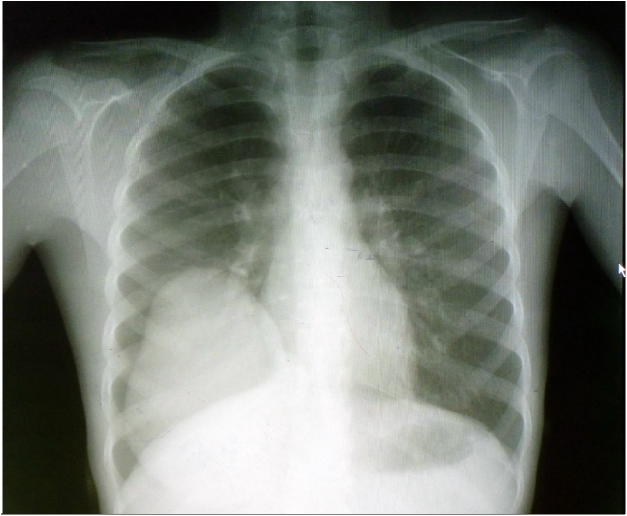

In [87]:

img=cv2.imread(img_path)
img

In [88]:
img.shape

(516, 627, 3)

array([[[255, 255, 255],
        [104, 103, 103],
        [103, 103, 103],
        ...,
        [100, 100, 100],
        [ 99,  99,  99],
        [187, 187, 187]],

       [[255, 255, 255],
        [ 14,  12,  12],
        [ 12,  10,  10],
        ...,
        [  8,   8,   8],
        [  6,   6,   6],
        [146, 146, 146]],

       [[255, 255, 255],
        [ 12,  10,  10],
        [ 12,  10,  10],
        ...,
        [  5,   5,   5],
        [  4,   4,   4],
        [146, 146, 146]],

       ...,

       [[255, 255, 255],
        [ 29,  37,  12],
        [ 28,  35,  13],
        ...,
        [ 13,  14,   1],
        [ 10,   6,   3],
        [148, 146, 145]],

       [[239, 239, 239],
        [ 29,  38,  11],
        [ 26,  34,  10],
        ...,
        [ 15,  16,   3],
        [  8,   4,   2],
        [149, 147, 146]],

       [[186, 186, 187],
        [176, 176, 176],
        [176, 176, 175],
        ...,
        [176, 176, 176],
        [177, 175, 175],
        [254, 254, 254]]], dtype=uint8)
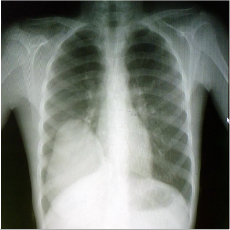

In [89]:
target_size=(230,230)
cv2.resize(img,target_size)

array([[255, 255, 255, ..., 255, 255, 255],
       [254, 255, 133, ...,   4, 128, 255],
       [255, 255, 132, ...,   4, 130, 254],
       ...,
       [254, 128,  78, ...,   4, 129, 255],
       [255, 127, 128, ..., 127, 254, 255],
       [254, 255, 254, ..., 255, 255, 255]], dtype=uint8)
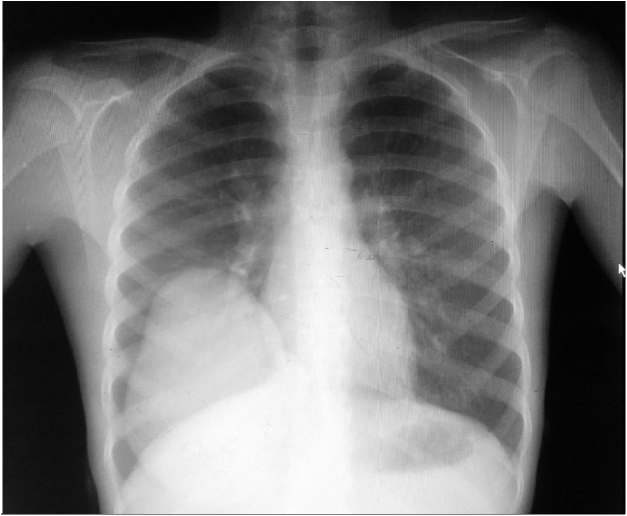

In [90]:
img_processed=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_processed


In [91]:

img_normalised=img/255
img_normalised

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.99607843, 0.99607843, 0.99607843],
        [1.        , 1.        , 1.        ],
        [0.52156863, 0.52156863, 0.52156863],
        ...,
        [0.02352941, 0.01568627, 0.01568627],
        [0.50196078, 0.50196078, 0.50196078],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [0.51764706, 0.51764706, 0.51764706],
        ...,
        [0.02352941, 0.01568627, 0.01568627],
        [0.50980392, 0.50980392, 0.50980392],
        [0.99607843, 0.99607843, 0.99607843]],

       ...,

       [[0.99607843, 0.99607843, 0.99607843],
        [0.50196078, 0.50196078, 0.50196078],
        [0.30588235, 0

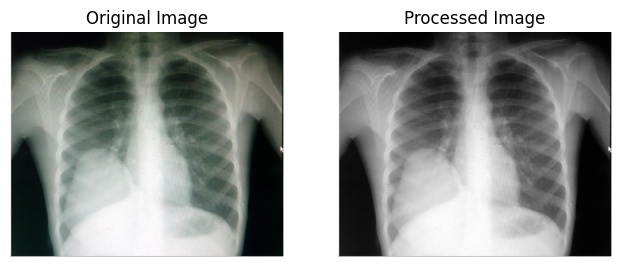

In [92]:

plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 3, 1)
img_original = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Processed Image (Grayscale & Normalized)
plt.subplot(1, 3, 2)
plt.imshow(img_processed.squeeze(), cmap='gray')
plt.title('Processed Image')
plt.axis('off')



plt.show()
